In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/HP/Downloads/bank.csv")

'''
**Description:**
This variable indicates whether a customer **subscribed to a bank deposit scheme** or **did not subscribe**.

* **Yes (1):** The customer agreed to open or invest in the bank’s term deposit.
* **No (0):** The customer did not agree to subscribe to the term deposit.

'''

'\n**Description:**\nThis variable indicates whether a customer **subscribed to a bank deposit scheme** or **did not subscribe**.\n\n* **Yes (1):** The customer agreed to open or invest in the bank’s term deposit.\n* **No (0):** The customer did not agree to subscribe to the term deposit.\n\n'

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.shape

(11162, 17)

In [5]:
df["deposit"].unique()

array([1, 0])

In [6]:
df["deposit"].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

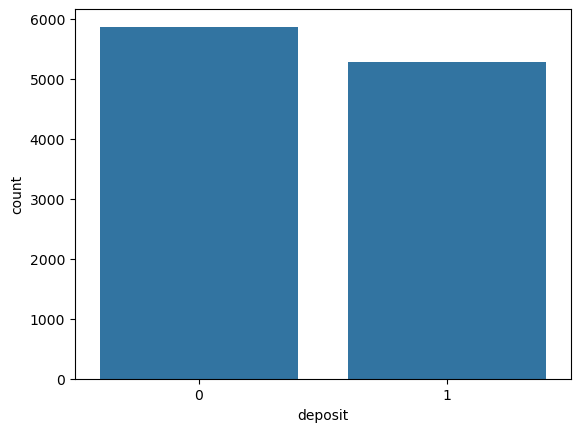

In [7]:
sns.countplot(data=df,x="deposit")
plt.show()

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
X=df.drop("deposit",axis=1) 
Y=df["deposit"]

In [12]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
X_train.shape,X_test.shape

((7813, 16), (3349, 16))

In [16]:
Y_train.shape,Y_test.shape

((7813,), (3349,))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
X_train

array([[ 2.76552511,  0.15596991, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.16824122, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.33637636,  1.39500692, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-1.18565083, -0.77330785, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-0.00870481, -1.39282635,  1.27358436, ...,  3.07264515,
         4.3350541 , -0.47109973],
       [-0.42904267, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [20]:
def create_model(model):  
    
    model.fit(X_train,Y_train)
    
    Y_pred=model.predict(X_test)
    
    print(confusion_matrix(Y_test,Y_pred))
    
    print(classification_report(Y_test,Y_pred))
    return model

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()

In [24]:
lr=create_model(lr)

[[1441  319]
 [ 358 1231]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier(random_state=1)

In [27]:
dt=create_model(dt)

[[1407  353]
 [ 372 1217]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [28]:
dt.feature_importances_

array([0.07713619, 0.03421951, 0.01696765, 0.01435638, 0.00045636,
       0.0844372 , 0.04261978, 0.00693398, 0.06179287, 0.07658144,
       0.09835692, 0.35400803, 0.02231605, 0.04785625, 0.02585105,
       0.03611034])

In [29]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [30]:
dict={'Input Column':X.columns,'Information gain':dt.feature_importances_}

df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,duration,0.354008
1,month,0.098357
2,balance,0.084437
3,age,0.077136
4,day,0.076581
5,contact,0.061793
6,pdays,0.047856
7,housing,0.042620
8,poutcome,0.036110
9,job,0.034220


In [31]:
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [32]:
dt=create_model(dt)

[[1433  327]
 [ 394 1195]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1760
           1       0.79      0.75      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [33]:
dict={'Input Column':X.columns,'Information gain':dt.feature_importances_}

df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,duration,0.311218
1,month,0.110721
2,balance,0.094507
3,day,0.090688
4,age,0.086951
5,contact,0.076067
6,pdays,0.046928
7,housing,0.032042
8,job,0.028838
9,campaign,0.027159


In [34]:
'''
for i in range (1,9) : #start =1 stop=9-1=8 step=1
    #create the object of DecisionTreeClassifier class and passing the value of max_depth=i
    dt=DecisionTreeClassifier(random_state=1,max_depth=i) #bydefault gini index 
    print("max_depth : ",i)
    #call function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
    '''

dt=DecisionTreeClassifier(random_state=1,max_depth=5) 


dt=create_model(dt)

[[1316  444]
 [ 228 1361]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [35]:
dict={'Input Column':X.columns,'Information gain':dt.feature_importances_}

df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,duration,0.576413
1,contact,0.119728
2,housing,0.066337
3,month,0.052438
4,poutcome,0.051127
5,pdays,0.050013
6,previous,0.044950
7,age,0.026846
8,loan,0.003762
9,day,0.003512


In [36]:
'''
for i in range(1,9): 
     #create the object of DecisionTreeClassifier class and passing the value of max_depth=i and criterion="entropy"
    dt=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")  
    print("max_depth : ",i)
    #call function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
    '''

dt=DecisionTreeClassifier(random_state=1,max_depth=6,criterion="entropy")  


dt=create_model(dt)

[[1364  396]
 [ 298 1291]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1760
           1       0.77      0.81      0.79      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [37]:
'''
for i in range(45,101): #start=45 stop=101-100=1
#create the object of DecisionTreeClassifier class and passing the value of min_samples_leaf=i and criterion="gini index"
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)  
    print("min_samples_leaf : ",i)
    #call function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
    '''

dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)  

dt=create_model(dt)

[[1379  381]
 [ 204 1385]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [38]:
dict={'Input Column':X.columns,'Information gain':dt.feature_importances_}

df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,duration,0.496317
1,month,0.109126
2,contact,0.105357
3,housing,0.068329
4,poutcome,0.059375
5,pdays,0.044066
6,age,0.043918
7,previous,0.036294
8,balance,0.021749
9,day,0.005046


In [39]:
'''
for i in range(45,101): #start=45 stop=101-100=1
     #create the object of DecisionTreeClassifier class and passing the value of min_samples_leaf=i and criterion="entropy"
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion="entropy")  
    print("min_samples_leaf : ",i)
    #call function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
    '''

dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion="entropy")  
   
dt=create_model(dt)

[[1438  322]
 [ 283 1306]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
''' 
for i in range(10,101):   
    
    rfc=RandomForestClassifier(random_state=1,n_estimators=i)
    
    print("No. of Decision Tree : ",i)
    
    rfc=create_model(rfc)
'''
rfc=RandomForestClassifier(random_state=1,n_estimators=19)
rfc=create_model(rfc)

[[1427  333]
 [ 213 1376]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1760
           1       0.81      0.87      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [42]:
rfc.feature_importances_

array([0.08927156, 0.03859344, 0.01919383, 0.02095385, 0.00136687,
       0.08903466, 0.03145709, 0.00991817, 0.03887241, 0.06927657,
       0.08565381, 0.36967829, 0.03215338, 0.04992854, 0.0198057 ,
       0.03484183])

In [43]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [44]:
dict={'Input Column':X.columns,'Information gain':rfc.feature_importances_}
#converts into  dataframe 
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,duration,0.369678
1,age,0.089272
2,balance,0.089035
3,month,0.085654
4,day,0.069277
5,pdays,0.049929
6,contact,0.038872
7,job,0.038593
8,poutcome,0.034842
9,campaign,0.032153


In [45]:
!pip install xgboost

In [46]:
from xgboost import XGBClassifier

In [47]:
''' 
for i in range(10,101):
    #create the object of XGBClassifier class
    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    #reg_alpha=1 means to reduced overfitting of model
    print("No. of decision tree : ",i)
    #call function
    xgb=create_model(xgb)
'''
xgb=XGBClassifier(n_estimators=30,random_state=1,reg_alpha=1)

xgb=create_model(xgb)

[[1459  301]
 [ 182 1407]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.82      0.89      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [48]:
dict={'Input Column':X.columns,'Information gain':xgb.feature_importances_}
#converts into  dataframe 
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,contact,0.177039
1,duration,0.165595
2,poutcome,0.160196
3,housing,0.142993
4,pdays,0.066612
5,month,0.060707
6,loan,0.042466
7,age,0.031001
8,day,0.026263
9,campaign,0.024532


In [49]:
''' bank dataset                                               Accuracy                  Recall Score
Algorithm Name                                                  
1. Logistic Regression                                           80%                          77%
2. DecisionTree with GINI                                        78%                          77%
3. DecisionTree with Entropy                                     78%                          75%
4. Pruning Tech.
   A. DecisionTree with GINIINDEX & max_depth=5                  80%                          86%          
   B. DecisionTree with Entropy & max_depth=6                    79%                          81%
   C. DecisionTree with GINIINDEX & min_samples_leaf=45          83%                          87% 
   D. DecisionTree with Entropy & min_samples_leaf=45            82%                          82%
5. Ensembling technique : Bootstraping 
    A. Random forest                                             84%                          87%
6. Ensembling technique : Boosting
    A. Extreme Gradient Boost(XGB)"                              86%                          89% Best algorithm for this dataset
'''

' bank dataset                                               Accuracy                  Recall Score\nAlgorithm Name                                                  \n1. Logistic Regression                                           80%                          77%\n2. DecisionTree with GINI                                        78%                          77%\n3. DecisionTree with Entropy                                     78%                          75%\n4. Pruning Tech.\n   A. DecisionTree with GINIINDEX & max_depth=5                  80%                          86%          \n   B. DecisionTree with Entropy & max_depth=6                    79%                          81%\n   C. DecisionTree with GINIINDEX & min_samples_leaf=45          83%                          87% \n   D. DecisionTree with Entropy & min_samples_leaf=45            82%                          82%\n5. Ensembling technique : Bootstraping \n    A. Random forest                                             84%  